Load file and remove background signal

In [66]:
import sys
from pathlib import Path

sys.path.append(str(Path.cwd().parent / "src"))

In [67]:
print(sys.path[-1])

/Users/magdalenaglinka/Documents/code/hBN_PL/src


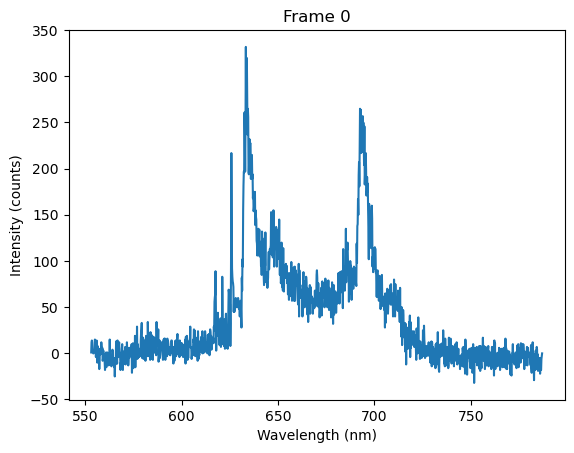

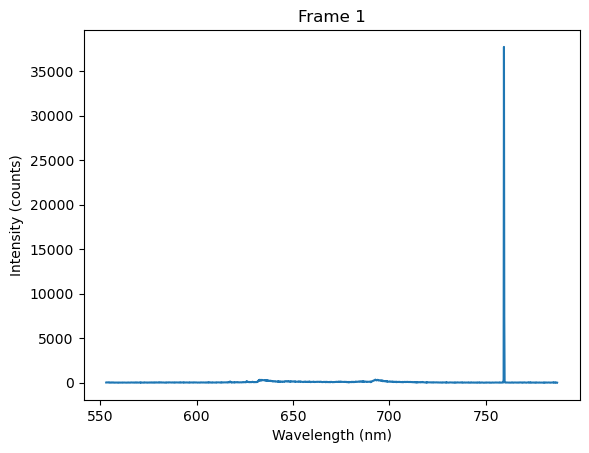

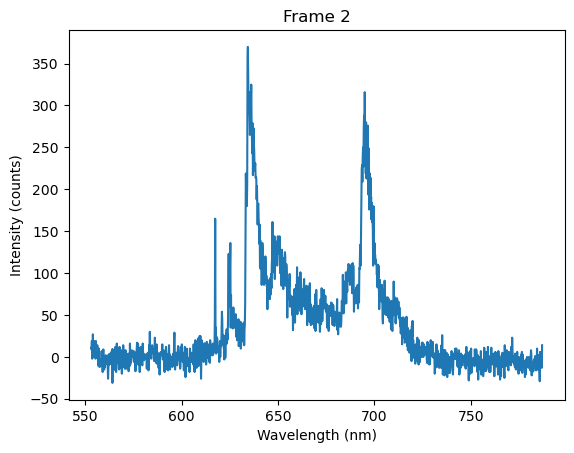

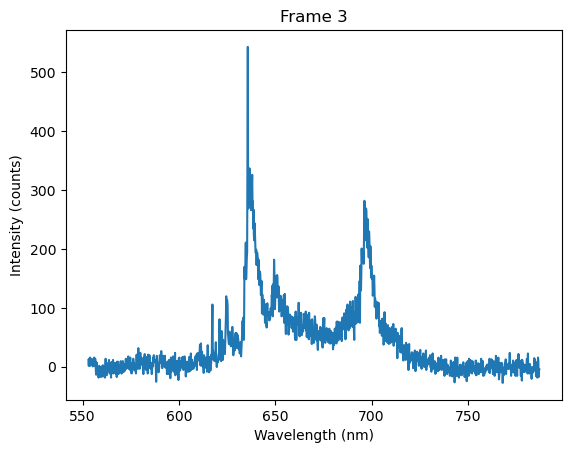

In [68]:
import hbn_pl.io as io
import hbn_pl.preprocess as preprocess
import hbn_pl.plot as plot
import hbn_pl.peaks as peaks


DATA_DIR = Path("/Users/magdalenaglinka/Documents/code/hBN_PL/Data/All data")
FILE_NAME = '2025-11-20 18_51_06 sample3_DCMd2_200uw_emitter14 2231.spe'
#FILE_NAME = '2025-11-17 17_34_30 sample5_DCMd2_200uw_emitter11 2189.spe'
#FILE_NAME = '2025-11-17 17_59_53 sample5_DCMd2_200uw_emitter17 2195.spe'
spe_path = DATA_DIR / FILE_NAME
wavelength, frames = io.load_spe(spe_path)
frames = frames[0:15]
frames = preprocess.background_subtract(frames, bg_slice=(1, 50))
plot.plot_frames(wavelength, frames)

Cosmic ray removal

In [69]:
frames_norm = preprocess.normalise(frames)
cosmic_frames = preprocess.detect_cosmic_frames(frames_norm, sigma_threshold=90, min_outliers=3)
frames = preprocess.remove_cosmic_rays(frames, cosmic_frames, sigma=2.5)

Detected 0 cosmic ray frames: []


Bad frame removal

In [70]:
drop_fraction = 0.6
bad_frames = preprocess.detect_bad_frames_simple(frames, drop_fraction = drop_fraction)
#bad_frames = preprocess.detect_bad_frames_complex(frames, window = 5, drop_fraction = drop_fraction)
#frames = preprocess.remove_frames(frames, bad_frames)

Detected bad frames due to intensity drop 0.6: []


Average and normalise

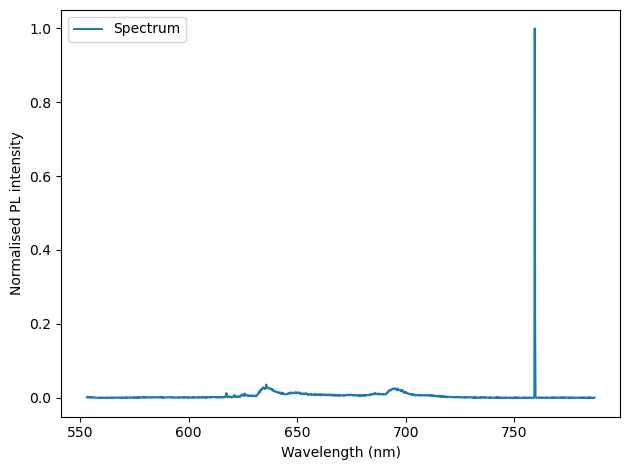

In [71]:
avg, avg_norm = preprocess.average_and_normalise(frames)
plot.plot_spectrum(wavelength, avg_norm)

## Peak finding

In [72]:
import hbn_pl.peaks2 as peaks2
import hbn_pl.classification2 as classification

Detected peaks:
{'location': np.float64(759.4730551480965), 'intensity': np.float64(1.0), 'fwhm': np.float64(0.17466134679159495), 'prominence': np.float64(1.0015866223876584)}


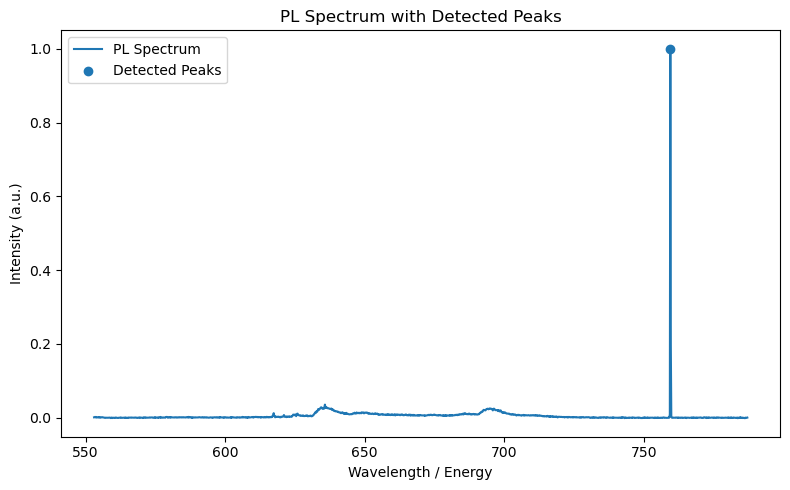

In [73]:
finder = peaks2.PeakFinder(wavelength, avg_norm)

finder.peak_finding(prominence=0.1)

peaks = finder.extract_peak_parameters()

print("Detected peaks:")
for p in peaks:
    print(p)

finder.plot_peaks()


## Classification

In [ ]:
classifier = classification.ZPLClassification(peaks, thresholds={
            "max_fwhm": 0.9,           
            "min_prominence": 0.7,   
            "location_range": [615, 660]    
        })

msg, zpl_peaks = classifier.classify()

print(msg)

Bad Data (no ZPLs detected)


## Ploty plot

In [75]:
finder.plot_zpl_on_spectrum(zpl_peaks)

LOSER EMITTER NO ZPLS
